# Comparing the Location Quotients of different ethnic diasporas across London

To analyse and visualise the data, a wide variety of different packages will be imported and used:

In [78]:
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

import pandas as pd            #for DataFrame and analysis
import numpy as np
import geopandas as gpd        #for mapping and spatial aggregation

import matplotlib.pyplot as plt  #use matplotlib to modify the plots (e.g. make them larger) 
import seaborn as sb             #for data viz
import palettable.colorbrewer.sequential as pcs #for choropleth maps
print('Done!')

Done!


The dataset I will be analysing is a from a  merged dataset- comprising of different types of data derived from multiple data sources. Specifically for our analysis, we will be selecting the ethnicity data (derived from NOMIS - service of ONS), and the London LSOA boundary data (from the London Data store).


Now let's first read in the data to be analysed and check the columns: 

In [4]:
my_df = pd.read_csv('Data/Merged_LSOA_Data.csv')
my_df.head(5)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,PM10max,PM10sd,NOxmean,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,40.9147,2.5343,116.7335,74.3843,368.4532,46.8249,57.8972,43.0877,127.2501,14.9486
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,32.2687,0.9467,86.3397,72.6057,191.7217,17.0302,47.6356,42.3820,80.7450,6.3878
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,33.6703,1.0226,86.1607,74.2665,189.0205,17.5927,47.3078,42.9148,81.4941,6.0950
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,59.8320,3.8027,132.1101,76.5674,893.0905,89.5282,61.1162,43.7231,234.1228,23.2659
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,25.0226,0.1474,51.3147,46.9127,57.4380,2.1936,32.5846,31.1267,34.9157,0.7742


In [6]:
my_df.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'GreenspaceArea', 'RoadsArea',
       'Owned', 'SharedOwnshp', 'SocialRented', 'PrivateRented', 'RentFree',
       'ORroomsM1', 'ORbedsM1', 'RoomsHH', 'BedsHH', 'White', 'MultiEthnic',
       'Asian', 'Black', 'OtherEthnic', 'MedianIncome', 'SumPrice',
       'MeanPrice', 'MedianPrice', 'EntireHome', 'PrivateRoom', 'SharedRoom',
       'SmallHost', 'MultiHost', 'PropertyCount', 'Area', 'PM25mean',
       'PM25min', 'PM25max', 'PM25sd', 'PM10mean', 'PM10min', 'PM10max',
       'PM10sd', 'NOxmean', 'NOxmin', 'NOxmax', 'NOxsd', 'NO2mean', 'NO2min',
       'NO2max', 'NO2sd'],
      dtype='object')

## Location Quotient (LQ) 

[Location Quotient](https://www.sciencedirect.com/topics/computer-science/location-quotient) is a geographic measure of understanding spatially the relative concentrations and distributions of a certain attribute, industry, occupation, demographic in comparison to the larger area. This is useful at identifying any unique attributes that a certain region/s possess. 

In this case, we are implementing the use of 'Location Quotient' (LQ) to identify and uncover any interesting patterns or features regarding different ethnic populations throughout the London. This is useful in a plethora of different ways - of understanding migratory patterns, communal developments etc. 

These LQs will be mapped according to the London LSOAs ([Lower layer Super Output Areas](https://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeographies/census2021geographies#lower-layer-super-output-areas-lsoas)) - which provide a smaller scale of spatial analysis within the borough boundaries. This allows for the different concentrations and distributions of different ethnicities to be to be more easily identified within those areas, which helps avoid the [MAUP](https://gisgeography.com/maup-modifiable-areal-unit-problem/) issue (a.k.a more accurately representing the data spatially).


## Calculations for each ethnicity 

London is an incredibly diverse area, made up all different sorts of ethnicities. However, for the purpose of this analysis, only 3 ethnic categories will be selected, used, and analysed - 'White', 'Black', 'Asian'. Therefore, the LQs will be calculated for each ethnic category.

The steps of calculating LQs for each ethnicity are: 
1. Calculating the proportion of specified ethnicity within each LSOA
2. Calculating the proportion of specified ethnicity within the whole area of London
3. divide the LSOA value by 2

Let's follow these steps to calculate the LQs for the 'White', 'Black', and 'Asian categories: 

### White

In [14]:
#the variable 'USUALRES refers to the total number of usual residents'
my_df['WhiteProp'] = my_df['White'] / my_df['USUALRES']

#describe function is used to check that the calculations were done correctly e.g. ensure the min and max values make sense
my_df['WhiteProp'].describe()

count    4835.000000
mean        0.607118
std         0.203529
min         0.035438
25%         0.459387
50%         0.630872
75%         0.775762
max         0.981591
Name: WhiteProp, dtype: float64

In [12]:
#Now calculating the proportion of 'White' people across the whole of London
my_df['WhitePropLon'] = my_df['White'].sum() / my_df['USUALRES'].sum()
my_df['WhitePropLon'].describe()

count    4835.000000
mean        0.597929
std         0.000000
min         0.597929
25%         0.597929
50%         0.597929
75%         0.597929
max         0.597929
Name: WhitePropLon, dtype: float64

In [13]:
my_df['WhiteLQ'] = my_df['WhiteProp'] / my_df['WhitePropLon']
my_df['WhiteLQ'].describe()

count    4835.000000
mean        1.015369
std         0.340390
min         0.059269
25%         0.768297
50%         1.055096
75%         1.297415
max         1.641651
Name: WhiteLQ, dtype: float64

### Black

In [15]:
#Now we can just compile all those different calculations like so 
my_df['BlackProp'] = my_df['Black'] / my_df['USUALRES']
my_df['BlackPropLon'] = my_df['Black'].sum() / my_df['USUALRES'].sum()
my_df['BlackLQ'] = my_df['BlackProp'] / my_df['BlackPropLon']
my_df['BlackLQ'].describe()

count    4835.000000
mean        0.980061
std         0.839817
min         0.009783
25%         0.323574
50%         0.711178
75%         1.422122
max         4.779173
Name: BlackLQ, dtype: float64

### Asian

In [16]:
#The same thing for the 'Asian' ethnicity category 
my_df['AsianProp'] = my_df['Asian'] / my_df['USUALRES']
my_df['AsianPropLon'] = my_df['Asian'].sum() / my_df['USUALRES'].sum()
my_df['AsianLQ'] = my_df['AsianProp'] / my_df['AsianPropLon']
my_df['AsianLQ'].describe()

count    4835.000000
mean        0.969649
std         0.873174
min         0.040659
25%         0.393438
50%         0.651014
75%         1.184914
max         4.699020
Name: AsianLQ, dtype: float64

Now that we have calculated the LQ values for all the different ethnicity categories throughout the London LSOAs, let's map these to identify any patterns in London.

### Sidenote - interpreting LQ values 

If the LQ values are: 

- less than 1.0 = the area has a lower concentration of that certain attribute than the wider area e.g. if Asian LQ 0.5, then that region has a lower concentration of the Asian's than the national average
  
- of 1.0 = the area has the same level of concentration of that certain attribute as the wider area e.g. if the Asian LQ value is 1.0, that area has the same level of a concentrated Asian population as the national average
  
- greater than 1.0 = the area has a greater concenration of that certain attribute than the wider area e.g. if the Asian LQ value is 1.4, that area has a higher concentration of Asians than the national average 

## Mapping the LQS

Spatially mapping data requires the the 'geometry' to be set within a Geodataframe: 

In [30]:
my_gdf = gpd.GeoDataFrame(my_df)  #geopandas

my_gdf['geometry'] = my_gdf['geometry'].apply(lambda x: loads(x))  #from shapely

my_gdf = my_gdf.set_geometry('geometry')

Now let's spatially map the Ethnicity LQs next to the population values and see how they vary. This will enable us to visualise any patterns and analyse the data- obtaining insight about the different characteristics of ethnic patterns of migration, movement, and community. 

### For the White population 

/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


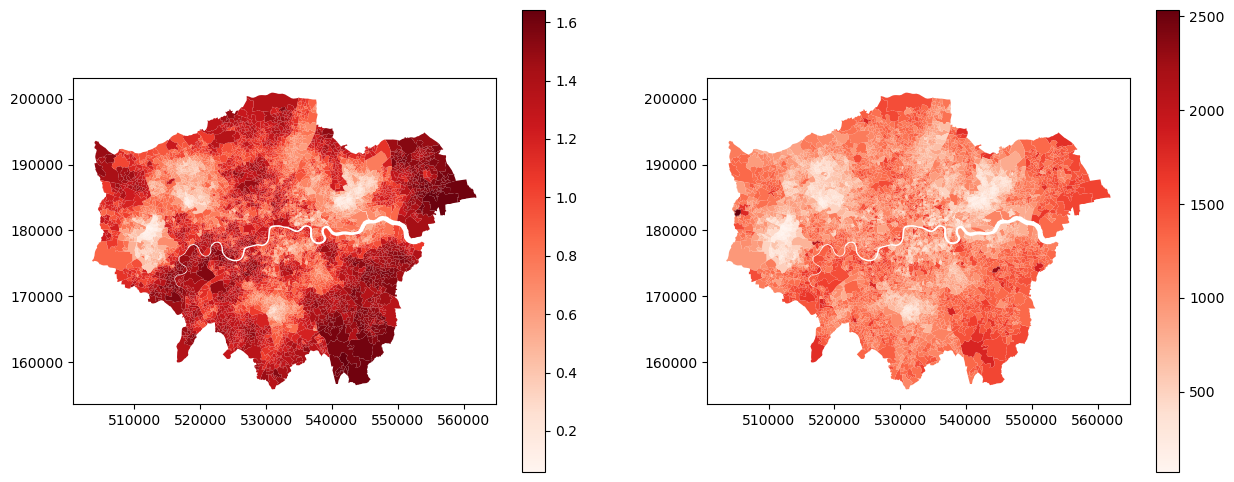

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15, 12))
my_gdf.plot(column='WhiteLQ', ax=ax[0], cmap='Reds', legend=True, legend_kwds={"shrink":.5})
my_gdf.plot(column='White', ax=ax[1], cmap='Reds', legend=True, legend_kwds={"shrink":.5})

plt.show()

According to this dataset, there appears to be a greater concentration of the White populations around the south-west areas (Havering, Barking & Dagenham), and in the lower south-east regions (Bromley, Bexley), as well as in the west (Richmond upon Thames, Wandsworth). Overall, there appears to be a greater concentration of white people towards the outer zones of London. It can be noted that there are lighter white areas that highlight these regions to have very few White inhabitants (in comparison to the other areas mentioned prior). These areas include - parts of Ealing, Hounslow, Brent, Barnet, Redbrige, Newham, as well as the upper area of Croydon. 

However, according to the statistical information shown prior, the maximum value for the White population was 1.641651: 

In [46]:
my_gdf['WhiteLQ'].describe()

count    4835.000000
mean        1.015369
std         0.340390
min         0.059269
25%         0.768297
50%         1.055096
75%         1.297415
max         1.641651
Name: WhiteLQ, dtype: float64

Therefore, whilst the choropleth map's visualisation may make the White population have a greater concentration within those concentrated areas, the other ethnicities ('Black' and 'Asian') exhibit higher levels of concentration according to their LQ values and colourbar visualised below: 

### For the Black population 

/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

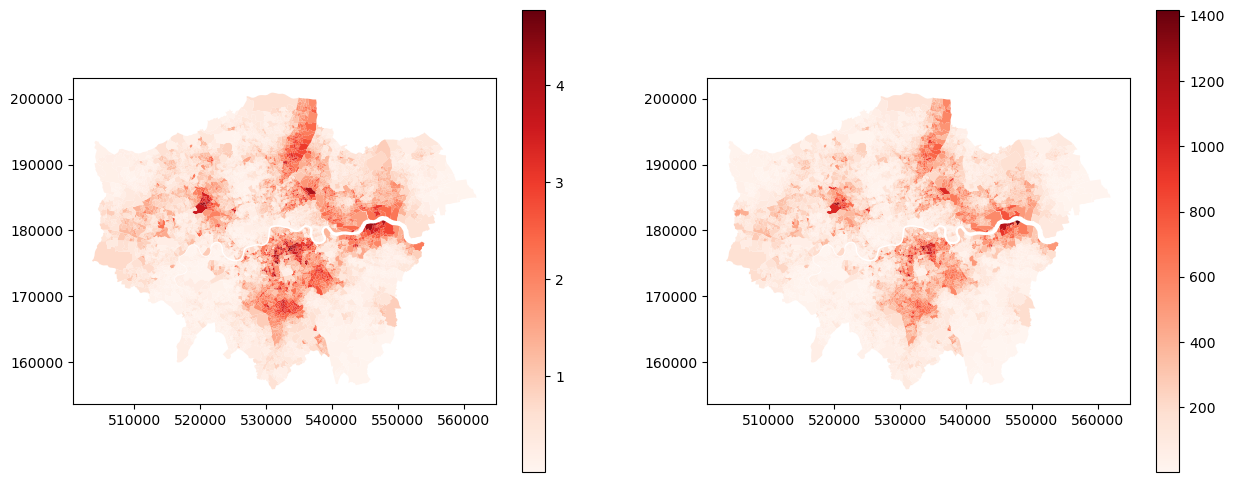

In [39]:
fig, ax = plt.subplots(1,2, figsize=(15, 12))
my_gdf.plot(column='BlackLQ', ax=ax[0], cmap='Reds', legend=True, legend_kwds={"shrink":.5})
my_gdf.plot(column='Black', ax=ax[1], cmap='Reds', legend=True, legend_kwds={"shrink":.5})

In comparison the Black population has fewer areas of concentrated regions, but these regions still include Northern areas (parts of Enfield, Haringey, Islington, and Hackney), and Eastern parts (areas of Tower Hamlets, Newham, and Greenwich), as well as South London (Lambeth, Southwark, Lewisham, Croydon, and Merton). There also appears to be more spread out concentrations along the North-West (parts of Brent, and Ealing). Within these more broad areas of high 'Black concentration' there are certain LSOAs which can be identified as having an even greater concentration of the 'Black population' - such as the LSOAs in Ealing, Greenwich, Wandsworth, Lambeth etc. 

If we identify the top LSOA that contain the highest LQ value: 

In [54]:
my_gdf[my_gdf['BlackLQ'] == my_gdf['BlackLQ'].max()].head(5)[['LSOA11NM', 'BlackProp', 'BlackLQ']]

,LSOA11NM,BlackProp,BlackLQ
2977,Lambeth 018B,0.636511,4.779173


And compare this to the top LSOA that contains the highest 'WhiteLQ' value: 

In [55]:
my_gdf[my_gdf['WhiteLQ'] == my_gdf['WhiteLQ'].max()].head(5)[['LSOA11NM', 'WhiteProp', 'WhiteLQ']]

,LSOA11NM,WhiteProp,WhiteLQ
644,Bromley 042A,0.981591,1.641651


We can see that the Black populations exhibit higher levels of concentration in an area, as the most concentrated LSOA for the 'Black' population is 4.779173 times greater than the national average of their respective concentration levels. As opposed to the White population's highest value - which is only 1.641651 times greater than their respective average. Therefore, despite the appearance of a less concentration (due to the lack of more darker coloured LSOA regions), as the colour bar encompasses a wider range, the 'Black' population does exhibit higher levels of concentration. This will be visualised further later on. 

Therefore, the 'Black' population does possess greater hotspots of concentration than their 'White counterparts'. Alongside this, the areas in which they are concentrated are fewer and moreso located in the inner zones of London (as opposed to it being more spread out like the 'White' populations). 

### For the Asian Population 

/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

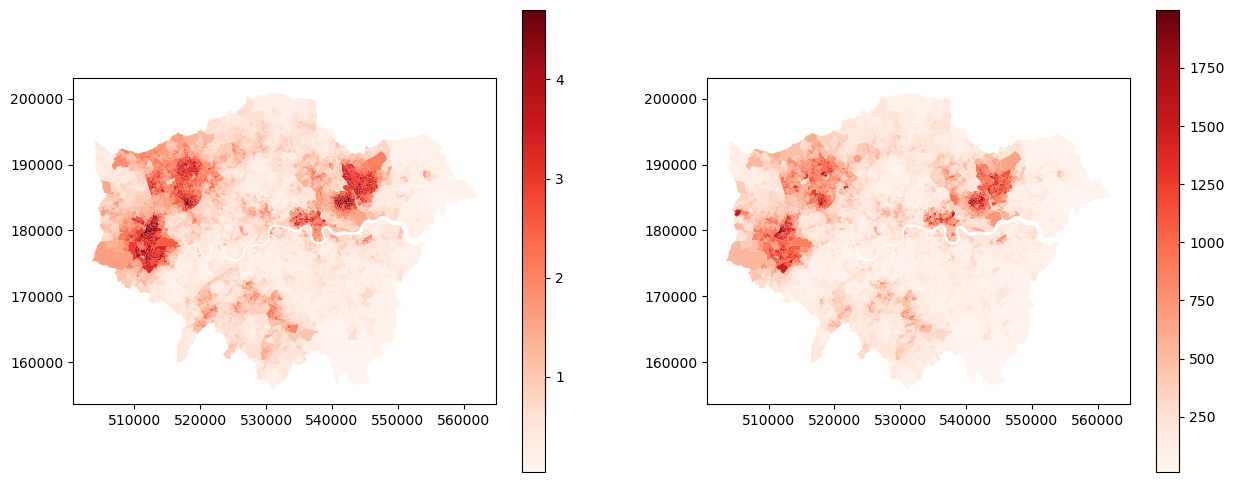

In [40]:
fig, ax = plt.subplots(1,2, figsize=(15, 12))
my_gdf.plot(column='AsianLQ', ax=ax[0], cmap='Reds', legend=True, legend_kwds={"shrink":.5})
my_gdf.plot(column='Asian', ax=ax[1], cmap='Reds', legend=True, legend_kwds={"shrink":.5})

On the other hand, the Asian population appear to have fewer populations spread out across London, but instead have hotspot regions of high Asian concentration, which include the Eastern parts (Redbridge, Newham, and Tower Hamlets), areas of North-West (Brent, Barnet, and Harrow), as well as the West (Ealing, Hounslow, and Hillingdon). However, in these regions, there appears to be a higher number of heavily concentrated population areas for the 'Asian', than the highly concentrated Black areas identified. This is highlighted by the greater number of darker coloured LSOAs within those regions. 

However, when looking at the max 'AsianLQ' value:

In [56]:
my_gdf[my_gdf['AsianLQ'] == my_gdf['AsianLQ'].max()].head(5)[['LSOA11NM', 'AsianProp', 'AsianLQ']]

,LSOA11NM,AsianProp,AsianLQ
1340,Ealing 026B,0.868955,4.69902


This indicates that the Asian population has a slightly lower concentration than the 'Black', but still quite highly concentrated nonetheless (that LSOA still has 4.69902 times more of the national Asian concentration of population average). However, there appears to be wider spread of those high concentrated populations across London in comparison to their 'Black' counterparts. 

## Analysis by borough - larger spatial scale analysis 

We can visualise these numerical LQ values with barcharts as well. However, as the scale of spatial analysis is by LSOAs, the dataset contains a significant number of rows that represent all the LSOAs present in London: 

In [63]:
my_gdf.shape

(4835, 67)

Our original dataset contains 4838 LSOAs, hence it would be difficult to visualise all the LQ values according to the individual LSOAs. Hence, we can visualise these LQ values according to the borough variable - 'LAD11NM'. For example, using Seaborn's 'barplort' function to plot a barchart of the different LQ values within each borough. 

### Barplots of the LQ values 

For the White LQs: 

/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


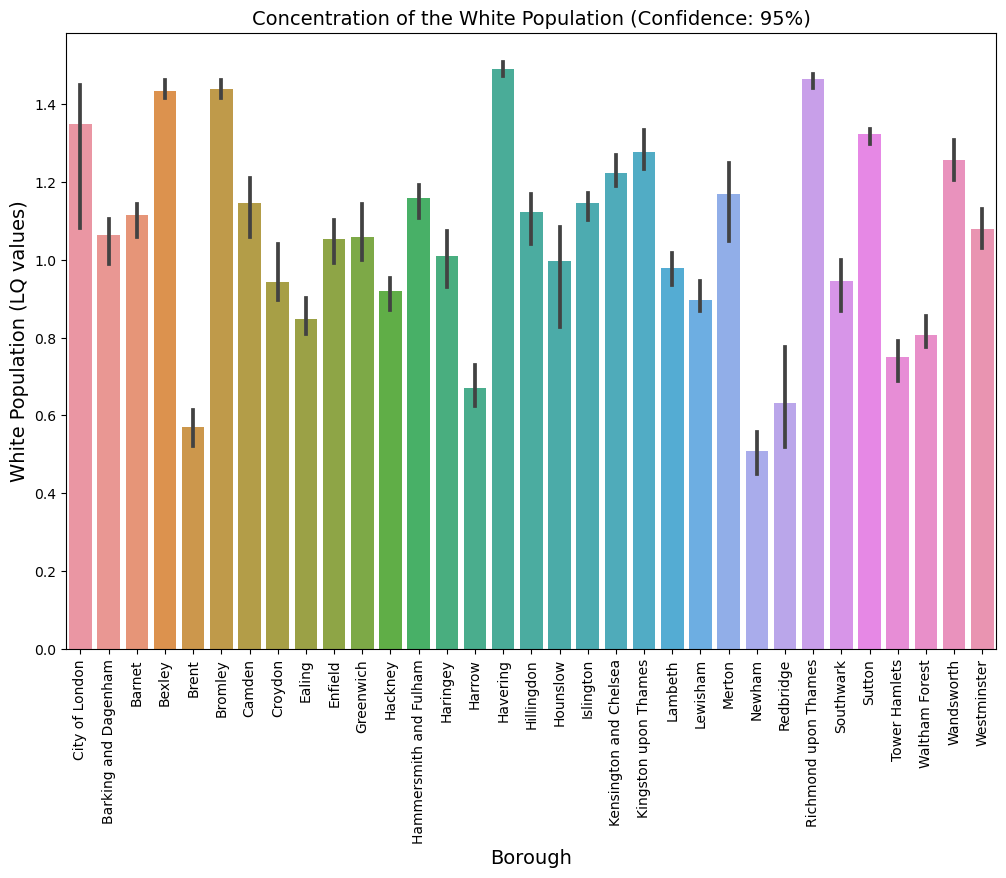

In [74]:
fig, ax = plt.subplots(1, figsize=(12, 8))
myci=95
sb.barplot(x='LAD11NM',
           y='WhiteLQ',
           estimator=np.median, #median used to avoid the potential data skewness from impacting the overall LQ value 
           data=my_gdf,  
           errorbar=('ci', 95))

plt.xticks(rotation=90)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('White Population (LQ values)', fontsize=14)          
plt.title("Concentration of the White Population (Confidence: {0}%)".format(myci), fontsize=14)
plt.show()

#Seaborn by default has used the mean values of the LQ 
#The error bars are also at 95% confidence 

According to this, the boroughs that contain the highest concentrations of the'White' population are - City of London, Bexley, Bromley, Havering, Richmond upon Thames, and Sutton amongst others. Hence, when analysed at a larger scale, we can determine which specific boroughs contain the highest concentrations.

When looking at both the 'Asian' and 'Black' LQ values: 

/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


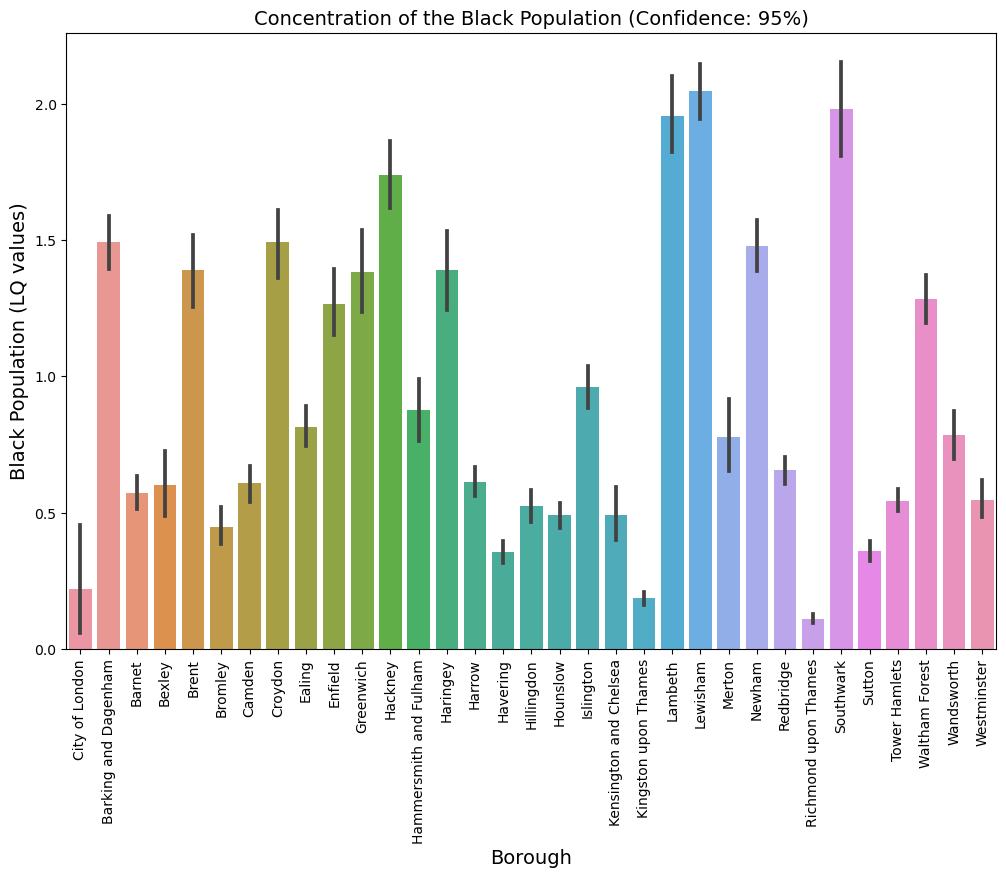

In [76]:
#The 'Black' LQ values 
fig, ax = plt.subplots(1, figsize=(12, 8))
myci=95
sb.barplot(x='LAD11NM',
           y='BlackLQ',
           data=my_gdf,  
           errorbar=('ci', 95))

plt.xticks(rotation=90)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Black Population (LQ values)', fontsize=14)          
plt.title("Concentration of the Black Population (Confidence: {0}%)".format(myci), fontsize=14)
plt.show()

/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bahriyahhasni/opt/anaconda3/envs/sds2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


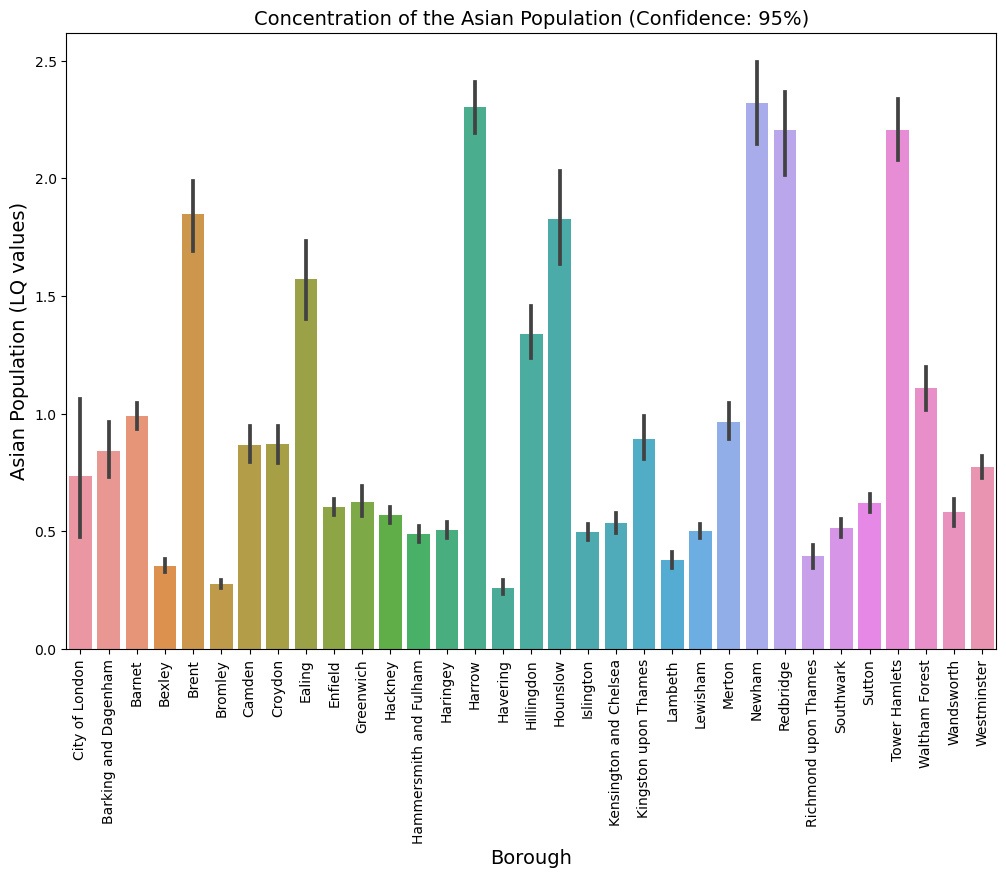

In [77]:
#The 'Asian' LQ values 

fig, ax = plt.subplots(1, figsize=(12, 8))
myci=95
sb.barplot(x='LAD11NM',
           y='AsianLQ',
           data=my_gdf,  
           errorbar=('ci', 95))

plt.xticks(rotation=90)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Asian Population (LQ values)', fontsize=14)          
plt.title("Concentration of the Asian Population (Confidence: {0}%)".format(myci), fontsize=14)
plt.show()

Both the 'Asian' and 'Black' populations exhibit higher concentrations of their popuations, with these boroughs containing LQ values that exceed 1.5 (Hackney, Lambeth, Lewisham, and Southwark) for the 'Black' population, and these boroughs (Brent, Ealing, Harrow, Hounslow, Newham, Redbridge, Tower Hamlets) for the 'Asian' population. Thus highlighting that both these populations tend to be more densely concentrated than their 'White counterparts'. 

By identifying the concentrations of various ethnic populations and the extent of said concentrations, we could potentially analyse the future impacts of various governmental decision-making on the current present populations and highlight any disproportionate impacts. 
